In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_customers_dataset.csv')
location=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_geolocation_dataset.csv') 
order_item=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_order_items_dataset.csv')
payment=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_order_payments_dataset.csv')
reviews=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_order_reviews_dataset.csv')
products=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_products_dataset.csv')
orders=pd.read_csv(r'C:\Users\OLA\Downloads\Compressed\olist_orders_dataset.csv')

In [2]:
#1: What is the total revenue generated by Olist, and how has it changed over time?
df=orders.merge(payment,on='order_id')

In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [19]:
#Checking for nulls
for i in df.columns:
    print(i,df[i].isnull().sum())
    

order_id 0
customer_id 0
order_status 0
order_purchase_timestamp 0
order_approved_at 175
order_delivered_carrier_date 1888
order_delivered_customer_date 3132
order_estimated_delivery_date 0
payment_sequential 0
payment_type 0
payment_installments 0
payment_value 0


In [20]:
Total_revenue=df[(df['order_status']!='canceled') & (df['order_status']!='unavailable')]['payment_value'].sum()
a= f"The totak Revenue Generated is {round(Total_revenue/1000000,2)}M"
print(a)

The totak Revenue Generated is 15.74M


df.order_status.unique()

In [21]:
order_purchase=pd.to_datetime(df['order_purchase_timestamp'])
df['Month']=order_purchase.dt.month
df['Year']=order_purchase.dt.year

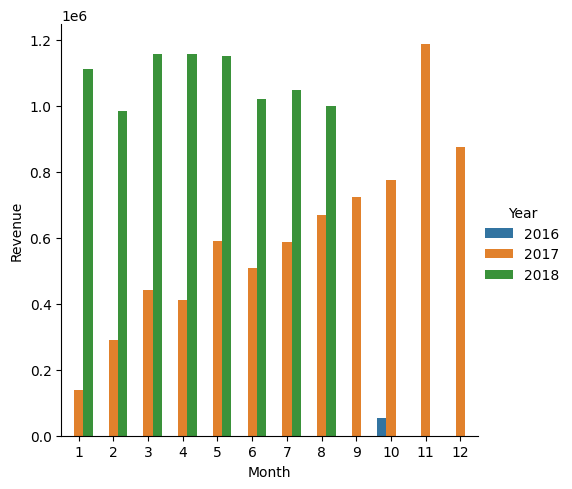

    Month  Year     Revenue
0       1  2016        0.00
1       2  2016        0.00
2       3  2016        0.00
3       4  2016        0.00
4       5  2016        0.00
5       6  2016        0.00
6       7  2016        0.00
7       8  2016        0.00
8       9  2016      136.23
9      10  2016    53915.50
10     11  2016        0.00
11     12  2016       19.62
12      1  2017   138119.76
13      2  2017   289081.01
14      3  2017   442406.37
15      4  2017   409846.01
16      5  2017   588529.96
17      6  2017   507302.62
18      7  2017   585331.36
19      8  2017   667224.47
20      9  2017   723781.27
21     10  2017   773104.35
22     11  2017  1187224.36
23     12  2017   874962.23
24      1  2018  1109464.00
25      2  2018   984790.19
26      3  2018  1156243.76
27      4  2018  1157336.33
28      5  2018  1149483.77
29      6  2018  1021220.02
30      7  2018  1047422.72
31      8  2018   998504.15
32      9  2018      166.46
33     10  2018        0.00
34     11  2018     

In [85]:
#Trend over time
can=df[df['order_status']!='canceled']
trend=can.groupby(['Month','Year'])['payment_value'].sum()
trend=pd.DataFrame(trend.unstack().fillna(0).reset_index())
trend.Month.replace(['January','Febuary','March','April','May','June','July','August','September','October','November','December'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df_melt=trend.melt('Month',var_name='Year',value_name='Revenue')
sns.catplot(y='Revenue',x='Month',data=df_melt,kind='bar',hue='Year')
plt.show()
print(df_melt)

C:\Users\OLA\AppData\Local\Temp\ipykernel_15304\913189957.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='Month',y='Revenue',data=x,kind='bar',ci=None,hue='Year')


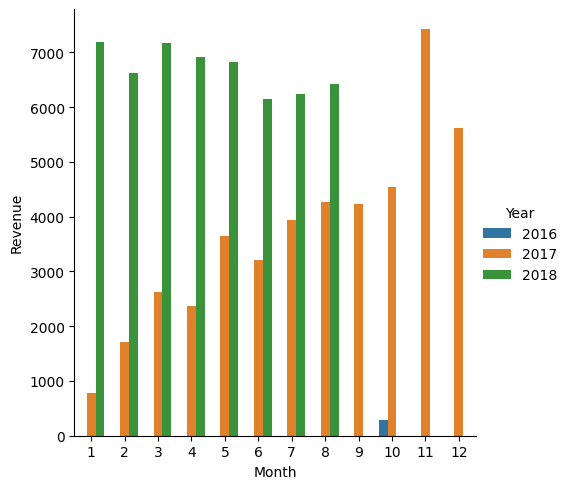

In [82]:
#How many orders were placed on Olist, and how does this vary by month or season?
Total_orders=df[(df['order_status']!='canceled') & (df['order_status']!='unavailable')]
order_placed=Total_orders.order_id.nunique()
#print(f'The Total Orders Placed was {order_placed}')

x=pd.DataFrame(Total_orders.groupby(['Month','Year'])['order_id'].nunique())
x=pd.DataFrame(x.fillna(0))
x=x.reset_index()
x.columns=['Month','Year','Revenue']
sns.catplot(x='Month',y='Revenue',data=x,kind='bar',ci=None,hue='Year')



#assigning 1 to each order
#df.describe()
#Trend in 2017


In [168]:
# What are the most popular product categories on Olist, and how do their sales volumes compare to each other?
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [169]:
pro=products.groupby('product_category_name')['product_category_name'].count()
pro[pro.values==max(pro.values)]

product_category_name
cama_mesa_banho    3029
Name: product_category_name, dtype: int64

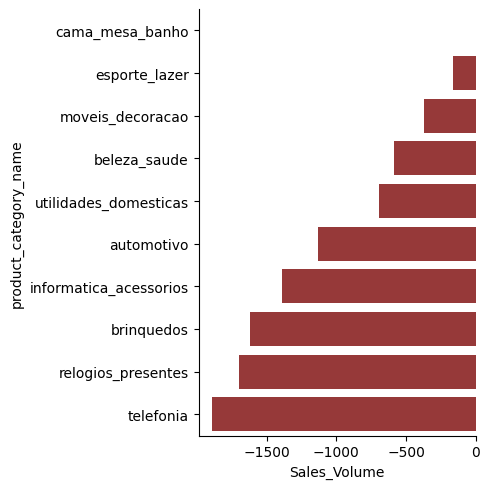

In [170]:
#How its sales volume compares to others
comparison=pd.DataFrame(pro)
comparison['Sales_Volume']=comparison.product_category_name - 3029
comp=comparison['Sales_Volume'].sort_values(ascending=False)[:10]
comp=comp.reset_index()
sns.catplot(x='Sales_Volume',y='product_category_name',data=comp,kind='bar',color='brown')



In [84]:
#Average order value
AOV=Total_revenue/can.order_id.nunique()
print(round(AOV,2))

159.28


In [88]:
df_order_item=df.merge(order_item,on='order_id')
df_order_item_products=df_order_item.merge(products,on='product_id')

In [89]:
c=df_order_item_products[(df_order_item_products['order_status']!='canceled')&(df_order_item_products['order_status']!='unavailable')]
d=pd.DataFrame(c.groupby('payment_type')['payment_value'].sum())
e=pd.DataFrame(c.groupby('payment_type')['order_id'].count()) 

In [91]:
#d=d.reset_index(b[
#e=e.reset_index()
d['AOV']=round(d['payment_value']/e['order_id'],2)


In [92]:
d

,payment_value,AOV
payment_type,,
boleto,4029165.91,176.94
credit_card,15473124.07,179.24
debit_card,250845.88,148.87
voucher,403039.72,64.54


In [176]:
#Sellers present on Olist
order_item.seller_id.nunique()

3095

In [177]:
#sellers active on olist
orderitem=order_item['seller_id'].value_counts()

In [158]:
orderitem[orderitem.values>50]

6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
efcd8d2104f1a05d028af7bad20d974b      51
048c2757535328e0d7dac690ad3c0aae      51
20cb7c2fde3e5bf10f0bbe7394e1c6a9      51
e0a366315b1b726b6c7832d664c0f530      51
dc8798cbf453b7e0f98745e396cc5616      51
Name: seller_id, Length: 462, dtype: int64

In [93]:
#No. of customers who made repeated purchase repeat values
Repeated=customers.merge(orders,on='customer_id')
Repeat=(Repeated.customer_unique_id.value_counts()>1).sum()
print(f' The no. of customers who made repeated purchases are  {Repeat}')

 The no. of customers who made repeated purchases are  2997


In [97]:
#total number of orders made
no_of_orders=Repeated.order_id.nunique()
no_of_repeat_orders=(Repeated.customer_unique_id.value_counts()>1).sum()

#what percentage of total sales do they account for?
Percentage=round((no_of_repeat_orders/no_of_orders),2)*100
print(Percentage)

3.0


In [98]:
# What is the average customer rating for products sold on Olist
round(reviews.review_score.mean(),2)

4.07

In [99]:
rev_ord=reviews.merge(order_item,on='order_id')
rev_ord_prod=rev_ord.merge(products,on='product_id')
nr=pd.DataFrame(rev_ord_prod.groupby('product_category_name')[['review_score','order_id']].agg(np.mean)).reset_index()
nr['sales_performance']=(pd.DataFrame(rev_ord_prod.groupby('product_category_name')[['order_id']].nunique()).reset_index())['order_id']
nr.columns=['Product Category Name','Average Rating','Sales Performance']
nr

,Product Category Name,Average Rating,Sales Performance
0,agro_industria_e_comercio,4.000000,182
1,alimentos,4.145098,450
2,alimentos_bebidas,4.303571,227
3,artes,3.918660,202
4,artes_e_artesanato,4.125000,23
...,...,...,...
68,sinalizacao_e_seguranca,4.070352,140
69,tablets_impressao_imagem,4.048193,79
70,telefonia,3.935604,4199
71,telefonia_fixa,3.671698,217


In [293]:
#Cancelation rate
cancelled=orders[orders['order_status']=='canceled']
round((cancelled.order_id.nunique()/orders.order_id.nunique()),2)*100

1.0

In [322]:
oo=orders.merge(order_item,on='order_id')
o=pd.DataFrame(oo.groupby('seller_id')[['price','freight_value']].sum()).reset_index()
p=oo[oo['order_status']=='canceled']
q=oo[oo['order_status']!='canceled']
l=pd.DataFrame(q.groupby('seller_id')['order_id'].nunique()).reset_index()
m=pd.DataFrame(p.groupby('seller_id')['order_id'].nunique()).reset_index()
n=l.merge(m,on='seller_id',how='left')
w=n.merge(o,on='seller_id')
w['Cancelation rate']=round(w.order_id_y/w.order_id_x,2)*100
w['Revenue']=w.price+w.freight_value
w.fillna(0,inplace=True)


,seller_id,order_id_x,order_id_y,price,freight_value,Cancelation rate,Revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,3,0.0,2685.00,63.06,0.0,2748.06
1,001cca7ae9ae17fb1caed9dfb1094831,200,0.0,25080.03,8854.14,0.0,33934.17
2,002100f778ceb8431b7a1020ff7ab48f,51,0.0,1234.50,793.66,0.0,2028.16
3,003554e2dce176b5555353e4f3555ac8,1,0.0,120.00,19.38,0.0,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,158,0.0,19712.71,3551.23,0.0,23263.94
...,...,...,...,...,...,...,...
3051,ffc470761de7d0232558ba5e786e57b7,28,0.0,1649.01,438.12,0.0,2087.13
3052,ffdd9f82b9a447f6f8d4b91554cc7dd3,18,0.0,2101.20,727.46,0.0,2828.66
3053,ffeee66ac5d5a62fe688b9d26f83f534,14,0.0,1839.86,419.69,0.0,2259.55
3054,fffd5413c0700ac820c7069d66d98c89,59,1.0,9062.30,2833.74,2.0,11896.04


In [238]:
v.order_id.nunique()

99441

In [239]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

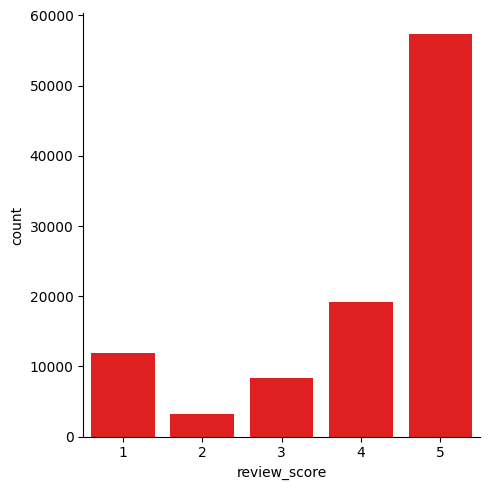

In [25]:
#Distributions of reviews
sns.catplot(kind='count',x='review_score',data=reviews,color='Red')

In [26]:
rev=orders.merge(reviews,on='order_id')

In [27]:
revv=rev.groupby('review_score')['order_id'].nunique()

In [28]:
rev

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
99996,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
99997,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
99998,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [100]:
# Which payment methods are most commonly used by Olist customers, and how does this vary by product category or geographic region?
payment_method=pd.DataFrame(payment['payment_type'].value_counts())
z=payment.merge(order_item,on='order_id')
y=z.merge(products,on='product_id')
print(payment_method)
y.groupby(['payment_type','product_category_name'])['payment_type'].count()

             payment_type
credit_card         76795
boleto              19784
voucher              5775
debit_card           1529
not_defined             3


payment_type  product_category_name    
boleto        agro_industria_e_comercio     60
              alimentos                    106
              alimentos_bebidas             77
              artes                         47
              artes_e_artesanato             7
                                          ... 
voucher       sinalizacao_e_seguranca        5
              tablets_impressao_imagem       4
              telefonia                    219
              telefonia_fixa                10
              utilidades_domesticas        505
Name: payment_type, Length: 270, dtype: int64

In [328]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
